# Il livello di istruzione degli individui non conta nel determinare la prosperità nazionale

Il progetto si focalizza sull'analisi della relazione tra istruzione e crescita
economica di un paese (dove per crescita economica si intende la capacità di produzione, più
in generale, di produrre ricchezza).

Comunemente si è portati a pensare che una forza lavoro ben istruita è un fattore
critico per lo sviluppo economico e ciò sarebbe dimostrabile dalla disparità tra il successo
economico dei paesi dell’Asia orientale, famosi per i loro alti livelli di istruzione, e la
stagnazione dei paesi dell’Africa subsahariana, che hanno livelli di istruzione tra i più bassi
al mondo. Inoltre, l’ascesa dell’economia della conoscenza, in cui la conoscenza è diventata
la principale fonte di ricchezza, ha reso l’istruzione, soprattutto quella universitaria, la vera
chiave della prosperità.

Tuttavia, sono scarse le prove che più istruzione renda un paese più ricco. Gran parte del
"know-how" acquisito tramite l’istruzione in realtà non è determinante per l’incremento
di produttività, anche se permette alla popolazione di avere una vita più soddisfacente e
indipendente.

Inoltre, l’opinione che il sorgere dell’economia basata sulla conoscenza abbia determinato
un aumento significativo del peso dell’istruzione può risultare fuorviante. Infatti, anche
quando si tratta di educazione universitaria (che si suppone ancora più importante in
un’economia della conoscenza) non c’è una rapporto automatico tra sapere e crescita economica.


Riassumendo, l’obiettivo del progetto è dimostrare che il livello di istruzione degli individui
non conta nel determinare la prosperità nazionale.

## Import librerie

In [78]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn import svm
from sklearn.svm import NuSVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, cohen_kappa_score, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib
import math

plt.style.use('seaborn-colorblind')

## Creazione dataset

### Durata media del periodo scolastico (Years of schooling)

Dati ottenuti da [Our World in Data](https://ourworldindata.org/global-education#years-of-schooling)

Dataset "Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))"

The average number of years spent in school are another common measure of a population’s education level. It is a helpful measure, because it allows aggregation of attainment across education levels. This allows an analysis of the ‘stock of human capital’ that a population has at any given point in time.

Average, or mean years of schooling of a population, are typically calculated from data on (i) the distribution of the population by age group and highest level of education attained in a given year; and (ii) the official duration of each level of education.

Struttura: **Entity** (paese) - **Year** - **Average total years of schooling**

E' presente un campionamento ogni 5 anni fino al 1990 poi uno ogni anno fino al 2017

In [ ]:
uri = "/dataset/YearsOfSchooling.csv"

### Tasso di alfabetizzazione

Dati ottenuti da [Our World in Data](https://ourworldindata.org/global-education#how-is-literacy-distributed-across-the-globe)

Tuttavia non sono presenti dati per il Nord America e per i paesi dell'Europa dell'ovest in quanto utilizzano altre prove per stimare il tasso di alfabetizzazione e quest'ultime non sono comparabili internazionalmente.

Vanno controllati i dati mancanti (molti) per i paesi e in caso possibile andreppe effettuata un'interpolazione per generare i dati mancanti. 

**DA VALUTARE SE INSERIRE**

### Percentuale di studenti (primary) che dovrebbero essere in primary

Dati ottenuti da [Our World In Data]()

## Dataset Barro e Lee (v. 2.2 - 2018)

Dopo vari tentativi, scontrandosi con un problema costante di dati mancanti ed un problema di divisione dei paesi (area geografica - income - metodo Pritchet) si è scelto di partire dal dataset [Barro e Lee](http://www.barrolee.com/) il quale assicura un buon punto di partenza con dati educativi quantitativi di 24 paesi considerati avanzati e 122 paesi in via di sviluppo (suddivisi ulteriormente in 6 grandi aree geografiche). A questo dataset si andranno poi ad aggiungere per i paesi in questione altri indicatori qualitativi e indicatori economici preservando i raggruppamenti effettuati dagli autori del dataset.

In [2]:
base_url = "dataset/"

df = pd.read_excel(base_url + 'barroAndLee.xlsx')
df.head()

,Country,Year,NoSchooling,PrimaryTotal,SecondaryTotal,TertiaryTotal,AvgYearsOfTotalSchooling,Population,Region
0,Australia,1950,1.27,44.79,43.17,10.77,8.04,6040,Advanced Economies
1,Australia,1955,1.12,40.63,46.57,11.69,8.27,6533,Advanced Economies
2,Australia,1960,0.96,36.52,49.91,12.60,8.53,7183,Advanced Economies
3,Australia,1965,0.80,31.30,53.69,14.21,8.93,8105,Advanced Economies
4,Australia,1970,0.76,23.73,56.25,19.26,9.70,9057,Advanced Economies


In [38]:
print(df.isna().sum())

Country                     0
Year                        0
NoSchooling                 0
PrimaryTotal                0
SecondaryTotal              0
TertiaryTotal               0
AvgYearsOfTotalSchooling    0
Population                  0
Region                      0
dtype: int64


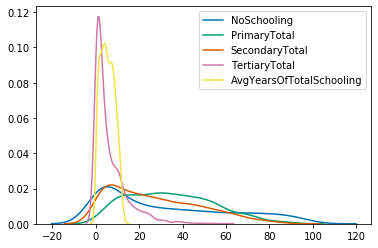

In [26]:
#df.groupby(["Country"]).mean()
sns.kdeplot(df["NoSchooling"])
sns.kdeplot(df["PrimaryTotal"])
sns.kdeplot(df["SecondaryTotal"])
sns.kdeplot(df["TertiaryTotal"])
sns.kdeplot(df["AvgYearsOfTotalSchooling"])

### Posizione TIMSS - 2019

Il Trends in International Mathematics and Science Study (TIMSS) dell'AIE è una serie di valutazioni internazionali delle conoscenze matematiche e scientifiche degli studenti di tutto il mondo è viene utilizzato come indicatore qualitativo della didattica. Gli studenti partecipanti provengono da una serie diversificata di sistemi educativi in termini di sviluppo economico, posizione geografica e dimensione della popolazione. In ciascuno dei sistemi educativi partecipanti, viene valutato un minimo di 4.000-5.000 studenti.

In [85]:
df_timss = pd.read_excel(base_url + 'timss19.xlsx')
df_timss.head()

,Country,m8,s8,m4,s4
0,Singapore,616.0,608.0,625.0,595.0
1,Taiwan,612.0,574.0,599.0,558.0
2,Hong Kong,578.0,504.0,602.0,531.0
3,South Korea,607.0,561.0,600.0,588.0
4,Japan,594.0,570.0,593.0,562.0


Essendo due dataset differenti i nomi dei paesi potrebbe differire, per evitare ciò si va a visualizzare i paesi del secondo dataset non presenti nel primo, così è possibile effettuare un check manuale ed evitare errori o perdite di dati

In [40]:
for i in range(len(df_timss["Country"])):
    if(df_timss.iloc[i]["Country"] in set(df["Country"])):
        # print(df_timss.iloc[i]["Country"] + " è presente")
        pass
    else:
        print(df_timss.iloc[i]["Country"] + " non è presente")

Northern Ireland non è presente
Georgia non è presente
Azerbaijan non è presente
Bosnia and Herzegovina non è presente
North Macedonia non è presente
Montenegro non è presente
Kosovo non è presente
Oman non è presente
Lebanon non è presente


Check nomi dei paesi per ogni file contenente timss (edizioni dal 2019 al 1995).

In [5]:
timss = ["timss19.xlsx", "timss15.xlsx", "timss11.xlsx", "timss07.xlsx", "timss03.xlsx", "timss99.xlsx", "timss95.xlsx"]
for filename in timss:
        actual_df = pd.read_excel(base_url + filename)
        actual_df_len = len(actual_df["Country"])
        
        for i in range(actual_df_len):
            if not(actual_df.iloc[i]["Country"] in set(df["Country"])):
                print("[" + filename + "] " + actual_df.iloc[i]["Country"] + " non è presente")

[timss19.xlsx] Northern Ireland non è presente
[timss19.xlsx] Georgia non è presente
[timss19.xlsx] Azerbaijan non è presente
[timss19.xlsx] Bosnia and Herzegovina non è presente
[timss19.xlsx] North Macedonia non è presente
[timss19.xlsx] Montenegro non è presente
[timss19.xlsx] Kosovo non è presente
[timss19.xlsx] Oman non è presente
[timss19.xlsx] Lebanon non è presente
[timss15.xlsx] Northern Ireland non è presente
[timss15.xlsx] Georgia non è presente
[timss15.xlsx] Oman non è presente
[timss15.xlsx] Lebanon non è presente
[timss11.xlsx] Northern Ireland non è presente
[timss11.xlsx] Georgia non è presente
[timss11.xlsx] Azerbaijan non è presente
[timss11.xlsx] Oman non è presente
[timss11.xlsx] Lebanon non è presente
[timss11.xlsx] Macedonia non è presente
[timss11.xlsx] Syria non è presente
[timss11.xlsx] Palestine non è presente
[timss07.xlsx] Scotland non è presente
[timss07.xlsx] Georgia non è presente
[timss07.xlsx] Bosnia and Herzegovina non è presente
[timss07.xlsx] Lebano

A questo punto vanno aggiunte le informazioni riguardante il punteggio timss di ogni paese in ogni edizione nel dataset primario. Tuttavia, il dataset primario (Barro and Lee) presenta campioni per paese ogni 5 anni il che risulta discrepante con le varie edizione in cui è presente un valore timss. Si è quindi deciso di procedere ritenendo valido l'ultimo punteggio più recente dello stato partecipante al timss per ogni campionamento quinquennale del dataset primario.

In [3]:
timss = ["timss07.xlsx", "timss03.xlsx", "timss99.xlsx", "timss95.xlsx"]

################### prova procedurale #########################

#df_07 = pd.read_excel(base_url + "timss07.xlsx")
#df_07["Year"] = 2010
# len07 = len(df_07)

# for i in range(len07):
#    row = df_07.iloc[i]
#    if(row["Country"] in set(df["Country"])):
#       df.loc[:, (df["Year"] == 2010) & (df["Country"] == row["Country"])]["m8"] = row["m8"]


# df = df.merge(df_07, how='left', on = ['Country', 'Year'])






################################################################


df["m8"] = np.nan
df["s8"] = np.nan
df["m4"] = np.nan
df["s4"] = np.nan

correspondent_year = {
                                "timss07.xlsx" : 2010,
                                "timss03.xlsx" : 2005,
                                "timss99.xlsx" : 2000,
                                "timss95.xlsx" : 1995
                      }

for filename in timss: 
        print("############### Processing: " + base_url + filename)
        actual_df = pd.read_excel(base_url + filename)
        #actual_df["Year"] = correspondent_year[filename]
        actual_df_len = len(actual_df)
        # print("Length: " + str(actual_df_len))
        #print(actual_df.head())
        
        for i in range(actual_df_len):
            row = actual_df.iloc[i]
            # print("Processing row " + str(i) + ", country " + row["Country"])
            if(row["Country"] in set(df["Country"])):
                # print(row["Country"] + " è presente nel dataset Barro e Lee")
                m8 = (actual_df[actual_df["Country"] == row["Country"]]["m8"]).values[0]
                s8 = (actual_df[actual_df["Country"] == row["Country"]]["s8"]).values[0]
                m4 = (actual_df[actual_df["Country"] == row["Country"]]["m4"]).values[0]
                s4 = (actual_df[actual_df["Country"] == row["Country"]]["s4"]).values[0]
                # print(m8)
                # print(s8)
                # print(m4)
                # print(s4)

                values = {"m8": m8, "s8": s8, "m4": m4, "s4": s4}                
                df.loc[(df["Year"] == correspondent_year[filename]) & (df["Country"] == row["Country"])] = df[(df["Year"] == correspondent_year[filename]) & (df["Country"] == row["Country"])].fillna(value=values)
                
        
        # print(df[(df["Year"] == correspondent_year[filename]) & (df["Country"] == actual_df.iloc[i]["Country"])])
        
        
        #print(df.head())
        # df = df.merge(actual_df, how='outer', on = ['Country', 'Year'])
        # print(df.head())
        
        # df_semi_merged = df[df["Year"] == correspondent_year[filename]].merge(actual_df, how='inner', on='Country')
        
        # print(df_semi_merged.head())
        
        # df[df["Year"] == correspondent_year[filename]] = df_semi_merged
        
        
                #df[(df["Year"] == correspondent_year[filename]) & (df["Country"] == actual_df.iloc[i]["Country"])]["m8"].fillna(actual_df["m8"])

                
                #df.loc[:, (df["Country"] == actual_df.iloc[i]["Country"]) & (df["Year"] == correspondent_year[filename])]) = ["m8-" + str(correspondent_year[filename])] = actual_df.iloc[i]["m8"]
                
                # df.loc[(df["Country"] == actual_df.iloc[i]["Country"]) & (df["Year"] == correspondent_year[filename])]["m8-" + str(correspondent_year[filename])] = actual_df.iloc[i]["m8"]
    
                #print(df.query("'Country' == " + actual_df.iloc[i]["Country"] + "  and 'Year' == " + str(correspondent_year[filename])))
            
                #print(df.loc(
                #    (df["Country"] == actual_df.iloc[i]["Country"]) & 
                #    (df["Year"] == correspondent_year[filename])))
                #["m8-" + str(correspondent_year[filename])] = actual_df.iloc[i]["m8"]
                
df.head()

############### Processing: dataset/timss07.xlsx
############### Processing: dataset/timss03.xlsx
############### Processing: dataset/timss99.xlsx
############### Processing: dataset/timss95.xlsx


,Country,Year,NoSchooling,PrimaryTotal,SecondaryTotal,TertiaryTotal,AvgYearsOfTotalSchooling,Population,Region,m8,s8,m4,s4
0,Australia,1950,1.27,44.79,43.17,10.77,8.04,6040,Advanced Economies,NaN,NaN,NaN,NaN
1,Australia,1955,1.12,40.63,46.57,11.69,8.27,6533,Advanced Economies,NaN,NaN,NaN,NaN
2,Australia,1960,0.96,36.52,49.91,12.60,8.53,7183,Advanced Economies,NaN,NaN,NaN,NaN
3,Australia,1965,0.80,31.30,53.69,14.21,8.93,8105,Advanced Economies,NaN,NaN,NaN,NaN
4,Australia,1970,0.76,23.73,56.25,19.26,9.70,9057,Advanced Economies,NaN,NaN,NaN,NaN


### PISA test scores

Dati ottenuti da [OWID](https://github.com/owid/owid-datasets/blob/4c73a1d2b4723c5a85d2370ef41ecc026129e643/datasets/OECD%20Education!%20PISA%20Test%20Scores%20-%20PISA%20(2015)/OECD%20Education!%20PISA%20Test%20Scores%20-%20PISA%20(2015).csv)

I punteggi dei test di istruzione PISA (lettura, matematica e scienze). La variabile media PISA OCSE è la media dei punteggi di matematica, lettura e scienze. Tale valore viene utilizzato per creare una classifica generale.

In [4]:
df_pisa = pd.read_excel(base_url + 'pisa.xlsx')
df_pisa.head()

,Country,Year,Pisa
0,Albania,2000,369.0
1,Albania,2009,384.0
2,Albania,2012,395.0
3,Argentina,2000,401.0
4,Argentina,2006,382.0


In [5]:
df_pisa['Year'] = pd.to_datetime(df_pisa.Year, format='%Y')
df_pisa.head()
df_pisa.set_index(["Country", "Year"])

Pisa
Country   Year             
Albania   2000-01-01  369.0
          2009-01-01  384.0
          2012-01-01  395.0
Argentina 2000-01-01  401.0
          2006-01-01  382.0
...                     ...
Uruguay   2003-01-01  411.0
          2006-01-01  423.0
          2009-01-01  427.0
          2012-01-01  412.0
Vietnam   2012-01-01  516.0

[272 rows x 1 columns]

In [46]:
print(df_pisa.isna().sum())

Country    0
Year       0
Pisa       9
dtype: int64


In [6]:
df_pisa_len = len(df_pisa["Country"])
        
for i in range(df_pisa_len):
    if not(df_pisa.iloc[i]["Country"] in set(df["Country"])):
        print(df_pisa.iloc[i]["Country"] + " non è presente")
        df_pisa.drop(i, axis=0)

Azerbaijan non è presente
Azerbaijan non è presente
Liechtenstein non è presente
Liechtenstein non è presente
Liechtenstein non è presente
Liechtenstein non è presente
Liechtenstein non è presente
Macedonia non è presente
Macedonia non è presente
Macedonia non è presente
Macedonia non è presente
Macedonia non è presente
Montenegro non è presente
Montenegro non è presente
Montenegro non è presente


In [7]:
duemila = (df_pisa[df_pisa.Year.dt.year == 2000]).groupby(['Country'])['Pisa'].mean().reset_index()
duemila5 = (df_pisa[df_pisa.Year.dt.year.between(2001, 2005)]).groupby(['Country'])['Pisa'].mean().reset_index()
duemila10 = (df_pisa[df_pisa.Year.dt.year.between(2005, 2010)]).groupby(['Country'])['Pisa'].mean().reset_index()

In [8]:
df["Pisa"] = np.nan


for i in range(len(duemila)):
    row = duemila.iloc[i]
    if(row["Country"] in set(df["Country"])):
        values = {"Pisa": row["Pisa"]}
        df.loc[(df["Year"] == 2000) & (df["Country"] == row["Country"])] = df[(df["Year"] == 2000) & (df["Country"] == row["Country"])].fillna(value=values)

for i in range(len(duemila5)):
    row = duemila5.iloc[i]
    if(row["Country"] in set(df["Country"])):
        values = {"Pisa": row["Pisa"]}
        df.loc[(df["Year"] == 2005) & (df["Country"] == row["Country"])] = df[(df["Year"] == 2005) & (df["Country"] == row["Country"])].fillna(value=values)

        
for i in range(len(duemila10)):
    row = duemila10.iloc[i]
    if(row["Country"] in set(df["Country"])):
        values = {"Pisa": row["Pisa"]}
        df[(df["Year"] == 2010) & (df["Country"] == row["Country"])] = df[(df["Year"] == 2010) & (df["Country"] == row["Country"])].fillna(value=values)

        
df.head(50)

,Country,Year,NoSchooling,PrimaryTotal,SecondaryTotal,TertiaryTotal,AvgYearsOfTotalSchooling,Population,Region,m8,s8,m4,s4,Pisa
0,Australia,1950,1.27,44.79,43.17,10.77,8.04,6040,Advanced Economies,NaN,NaN,NaN,NaN,NaN
1,Australia,1955,1.12,40.63,46.57,11.69,8.27,6533,Advanced Economies,NaN,NaN,NaN,NaN,NaN
2,Australia,1960,0.96,36.52,49.91,12.60,8.53,7183,Advanced Economies,NaN,NaN,NaN,NaN,NaN
3,Australia,1965,0.80,31.30,53.69,14.21,8.93,8105,Advanced Economies,NaN,NaN,NaN,NaN,NaN
4,Australia,1970,0.76,23.73,56.25,19.26,9.70,9057,Advanced Economies,NaN,NaN,NaN,NaN,NaN
5,Australia,1975,1.07,12.75,65.46,20.72,10.52,9865,Advanced Economies,NaN,NaN,NaN,NaN,NaN
6,Australia,1980,0.80,6.10,69.90,23.20,11.20,10937,Advanced Economies,NaN,NaN,NaN,NaN,NaN
7,Australia,1985,1.12,7.80,67.54,23.48,11.20,11973,Advanced Economies,NaN,NaN,NaN,NaN,NaN
8,Australia,1990,1.09,9.25,65.33,24.33,11.18,13178,Advanced Economies,NaN,NaN,NaN,NaN,NaN
9,Australia,1995,1.37,10.81,60.35,27.47,11.20,14009,Advanced Economies,530.0,545.0,546.0,562.0,NaN


### Spesa in educazione (% del pil)

Dati ottenuti da [Wordl Bank Data](https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS)

Contiene la spesa in educazione come percentuale del PIL di ogni paese, sono presenti dati dal 1970 al 2010.

Al fine di ottenere dati continui nell'intervallo '1970-'2010 si seleziona per ogni campione di ogni 5 anni il valore dell'anno corretto (se presente) altrimenti il più recente nel quinquennio precedente.

In [148]:
df_edu = pd.read_excel(base_url + 'educationalExpenditure.xlsx')
df_edu.head()

,Country,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010]
0,Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.57000,2.90000,2.85000,3.51000,3.73000,3.479450
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4587,3.11780,3.13823,3.22752,3.28155,3.19146,3.27593,NaN,NaN,3.413075
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.62000,4.96000,4.33702,6.03000,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.71705,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.65971,NaN,1.54412,1.64497,2.24490,2.10469,2.87393,3.14292,2.976630


In [149]:
def get_new_name(old_name):
    if old_name == "Country":
        return old_name
    return old_name[:len(old_name) - 8]

for column in df_edu.columns.values:
    new_name = get_new_name(column)
    if(new_name == "Country"):
        continue
    df_edu[new_name] = df_edu[column]
    df_edu = df_edu.drop(column, axis=1)

    
df_edu.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.57000,2.90000,2.85000,3.51000,3.73000,3.479450
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4587,3.11780,3.13823,3.22752,3.28155,3.19146,3.27593,NaN,NaN,3.413075
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.62000,4.96000,4.33702,6.03000,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.71705,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.65971,NaN,1.54412,1.64497,2.24490,2.10469,2.87393,3.14292,2.976630


In [150]:
df_edu_2 = pd.DataFrame()
number_of_years = len(df_edu.columns) - 1

for i in range(len(df_edu)):
    # salvo la riga attuale
    current_row = df_edu.iloc[i]
        # la elimino dal dataset utilizzato l'index e axis = 0
        #df_edu = df_edu.drop(i)
    # creo la series Country * 40
    country = pd.Series([current_row["Country"]] * number_of_years)
    # creo la series Year = np.arange
    year = pd.Series(np.arange(1970, 2011, 1, dtype=int).tolist())
    # creo la series eduExpenditure copiando la riga attuale (eliminata)
    eduExp = []
    for j in range(len(current_row)):
        if j == 0:
            continue
        else:
            eduExp.append(current_row[j])
    eduExp_s = pd.Series(eduExp)
    # creo un dataframe con specificando nomi e series  (le tre precedenti)
    df_partial = pd.DataFrame({"Country": country, "Year": year, "EduExp": eduExp_s})
    df_partial.reset_index(drop=True, inplace=True)
    # concateno il dataframe a df_edu_2
    df_edu_2 = pd.concat([df_edu_2, df_partial])
    
df_edu_2.head()


,Country,Year,EduExp
0,Afghanistan,1970,NaN
1,Afghanistan,1971,1.16036
2,Afghanistan,1972,1.11718
3,Afghanistan,1973,1.42788
4,Afghanistan,1974,NaN


In [151]:
def get_most_recent_value(country, year):
    i_year = int(year)
    most_recent = np.nan
    lower_limit = 1970
    while((i_year > int(year) - 5) and (i_year > 1970) and (math.isnan(most_recent))):
        most_recent = df_edu_2[(df_edu_2["Country"] == country) & (df_edu_2["Year"] == (i_year - 1))]["EduExp"].values[0]
        i_year -= 1
    return most_recent

In [152]:
years = ["1970", "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010"]
countries = df_edu_2["Country"].unique()
df["EducationalExpenditure"] = np.nan

for country in countries:
    if(country in set(df["Country"])):
        for year in years:
            #print("## Parsing " + country + " " + year)
            selected_value = df_edu_2[(df_edu_2["Country"] == country) & (df_edu_2["Year"] == int(year))]["EduExp"].values[0]
            if(math.isnan(selected_value)):
                selected_value = get_most_recent_value(country, year)
            values = {"EducationalExpenditure": float(selected_value)}
            df[(df["Year"] == int(year)) & (df["Country"] == country)] = df[(df["Year"] == int(year)) & (df["Country"] == country)].fillna(value=values)
    else:
        print(country + " non è presente")
    


1382   NaN
Name: EducationalExpenditure, dtype: float64
1383    1.30332
Name: EducationalExpenditure, dtype: float64
1384    1.84093
Name: EducationalExpenditure, dtype: float64
1385    1.72998
Name: EducationalExpenditure, dtype: float64
1386   NaN
Name: EducationalExpenditure, dtype: float64
1387   NaN
Name: EducationalExpenditure, dtype: float64
1388   NaN
Name: EducationalExpenditure, dtype: float64
1389    2.57
Name: EducationalExpenditure, dtype: float64
1390    3.47945
Name: EducationalExpenditure, dtype: float64
563   NaN
Name: EducationalExpenditure, dtype: float64
564   NaN
Name: EducationalExpenditure, dtype: float64
565   NaN
Name: EducationalExpenditure, dtype: float64
566   NaN
Name: EducationalExpenditure, dtype: float64
567   NaN
Name: EducationalExpenditure, dtype: float64
568    3.81464
Name: EducationalExpenditure, dtype: float64
569    3.43017
Name: EducationalExpenditure, dtype: float64
570    3.28155
Name: EducationalExpenditure, dtype: float64
571    3.413075
Nam

882    4.47908
Name: EducationalExpenditure, dtype: float64
883    5.6488
Name: EducationalExpenditure, dtype: float64
British Virgin Islands non è presente
316    6.23915
Name: EducationalExpenditure, dtype: float64
317    1.96134
Name: EducationalExpenditure, dtype: float64
318    1.19108
Name: EducationalExpenditure, dtype: float64
319    1.69715
Name: EducationalExpenditure, dtype: float64
320    3.95996
Name: EducationalExpenditure, dtype: float64
321    4.29403
Name: EducationalExpenditure, dtype: float64
322    3.70591
Name: EducationalExpenditure, dtype: float64
323    3.70591
Name: EducationalExpenditure, dtype: float64
324    2.04661
Name: EducationalExpenditure, dtype: float64
589   NaN
Name: EducationalExpenditure, dtype: float64
590   NaN
Name: EducationalExpenditure, dtype: float64
591    3.52948
Name: EducationalExpenditure, dtype: float64
592    3.52948
Name: EducationalExpenditure, dtype: float64
593    4.45406
Name: EducationalExpenditure, dtype: float64
594    2.3720

933    7.70481
Name: EducationalExpenditure, dtype: float64
934    10.55778
Name: EducationalExpenditure, dtype: float64
935    12.83731
Name: EducationalExpenditure, dtype: float64
Curacao non è presente
1174   NaN
Name: EducationalExpenditure, dtype: float64
1175    4.33502
Name: EducationalExpenditure, dtype: float64
1176    3.42601
Name: EducationalExpenditure, dtype: float64
1177    3.58696
Name: EducationalExpenditure, dtype: float64
1178    3.33924
Name: EducationalExpenditure, dtype: float64
1179    3.74123
Name: EducationalExpenditure, dtype: float64
1180    4.98954
Name: EducationalExpenditure, dtype: float64
1181    6.28667
Name: EducationalExpenditure, dtype: float64
1182    6.5428
Name: EducationalExpenditure, dtype: float64
615   NaN
Name: EducationalExpenditure, dtype: float64
616   NaN
Name: EducationalExpenditure, dtype: float64
617   NaN
Name: EducationalExpenditure, dtype: float64
618   NaN
Name: EducationalExpenditure, dtype: float64
619   NaN
Name: EducationalExpen

110    1.6857
Name: EducationalExpenditure, dtype: float64
111    1.81003
Name: EducationalExpenditure, dtype: float64
112    2.04608
Name: EducationalExpenditure, dtype: float64
113    1.93433
Name: EducationalExpenditure, dtype: float64
114    3.23019
Name: EducationalExpenditure, dtype: float64
115    3.96396
Name: EducationalExpenditure, dtype: float64
116    4.105631
Name: EducationalExpenditure, dtype: float64
Greenland non è presente
Grenada non è presente
Guam non è presente
979    1.85872
Name: EducationalExpenditure, dtype: float64
980    2.02554
Name: EducationalExpenditure, dtype: float64
981    1.62729
Name: EducationalExpenditure, dtype: float64
982   NaN
Name: EducationalExpenditure, dtype: float64
983   NaN
Name: EducationalExpenditure, dtype: float64
984    1.6048
Name: EducationalExpenditure, dtype: float64
985    1.5637
Name: EducationalExpenditure, dtype: float64
986   NaN
Name: EducationalExpenditure, dtype: float64
987    2.84865
Name: EducationalExpenditure, dtyp

166    3.46012
Name: EducationalExpenditure, dtype: float64
167    3.31494
Name: EducationalExpenditure, dtype: float64
168    3.59952
Name: EducationalExpenditure, dtype: float64
1239    3.63004
Name: EducationalExpenditure, dtype: float64
1240    3.76348
Name: EducationalExpenditure, dtype: float64
1241    5.08173
Name: EducationalExpenditure, dtype: float64
1242    5.93695
Name: EducationalExpenditure, dtype: float64
1243    5.64387
Name: EducationalExpenditure, dtype: float64
1244   NaN
Name: EducationalExpenditure, dtype: float64
1245    4.94417
Name: EducationalExpenditure, dtype: float64
1246    4.92
Name: EducationalExpenditure, dtype: float64
1247    3.1
Name: EducationalExpenditure, dtype: float64
654   NaN
Name: EducationalExpenditure, dtype: float64
655   NaN
Name: EducationalExpenditure, dtype: float64
656   NaN
Name: EducationalExpenditure, dtype: float64
657   NaN
Name: EducationalExpenditure, dtype: float64
658   NaN
Name: EducationalExpenditure, dtype: float64
659    4

1671    3.27885
Name: EducationalExpenditure, dtype: float64
1672    2.43537
Name: EducationalExpenditure, dtype: float64
1673   NaN
Name: EducationalExpenditure, dtype: float64
1674    2.97156
Name: EducationalExpenditure, dtype: float64
1675    3.52218
Name: EducationalExpenditure, dtype: float64
1676    3.34389
Name: EducationalExpenditure, dtype: float64
1278   NaN
Name: EducationalExpenditure, dtype: float64
1279    4.42221
Name: EducationalExpenditure, dtype: float64
1280    3.15364
Name: EducationalExpenditure, dtype: float64
1281    3.24834
Name: EducationalExpenditure, dtype: float64
1282    3.83142
Name: EducationalExpenditure, dtype: float64
1283    4.3141
Name: EducationalExpenditure, dtype: float64
1284    4.18472
Name: EducationalExpenditure, dtype: float64
1285    4.43493
Name: EducationalExpenditure, dtype: float64
1286    6.25004
Name: EducationalExpenditure, dtype: float64
Marshall Islands non è presente
1681   NaN
Name: EducationalExpenditure, dtype: float64
1682   N

1740    1.93706
Name: EducationalExpenditure, dtype: float64
1741    2.72195
Name: EducationalExpenditure, dtype: float64
Nigeria non è presente
North Macedonia non è presente
Northern Mariana Islands non è presente
212   NaN
Name: EducationalExpenditure, dtype: float64
213    5.55022
Name: EducationalExpenditure, dtype: float64
214    5.78015
Name: EducationalExpenditure, dtype: float64
215    5.25567
Name: EducationalExpenditure, dtype: float64
216    6.31038
Name: EducationalExpenditure, dtype: float64
217    7.69568
Name: EducationalExpenditure, dtype: float64
218    6.46727
Name: EducationalExpenditure, dtype: float64
219    6.86507
Name: EducationalExpenditure, dtype: float64
220    6.74634
Name: EducationalExpenditure, dtype: float64
Oman non è presente
1447   NaN
Name: EducationalExpenditure, dtype: float64
1448    1.98008
Name: EducationalExpenditure, dtype: float64
1449    2.13095
Name: EducationalExpenditure, dtype: float64
1450    2.43543
Name: EducationalExpenditure, dtype

764   NaN
Name: EducationalExpenditure, dtype: float64
765   NaN
Name: EducationalExpenditure, dtype: float64
766    4.32781
Name: EducationalExpenditure, dtype: float64
Seychelles non è presente
1785   NaN
Name: EducationalExpenditure, dtype: float64
1786   NaN
Name: EducationalExpenditure, dtype: float64
1787   NaN
Name: EducationalExpenditure, dtype: float64
1788   NaN
Name: EducationalExpenditure, dtype: float64
1789   NaN
Name: EducationalExpenditure, dtype: float64
1790   NaN
Name: EducationalExpenditure, dtype: float64
1791    4.94937
Name: EducationalExpenditure, dtype: float64
1792    2.79698
Name: EducationalExpenditure, dtype: float64
1793    2.58864
Name: EducationalExpenditure, dtype: float64
498   NaN
Name: EducationalExpenditure, dtype: float64
499    2.43949
Name: EducationalExpenditure, dtype: float64
500    2.55967
Name: EducationalExpenditure, dtype: float64
501    3.94772
Name: EducationalExpenditure, dtype: float64
502    3.65207
Name: EducationalExpenditure, dtype

538   NaN
Name: EducationalExpenditure, dtype: float64
539   NaN
Name: EducationalExpenditure, dtype: float64
540    10.34651
Name: EducationalExpenditure, dtype: float64
541   NaN
Name: EducationalExpenditure, dtype: float64
542   NaN
Name: EducationalExpenditure, dtype: float64
543    4.87808
Name: EducationalExpenditure, dtype: float64
544    3.91377
Name: EducationalExpenditure, dtype: float64
545   NaN
Name: EducationalExpenditure, dtype: float64
1109   NaN
Name: EducationalExpenditure, dtype: float64
1110   NaN
Name: EducationalExpenditure, dtype: float64
1111    3.76808
Name: EducationalExpenditure, dtype: float64
1112    5.76775
Name: EducationalExpenditure, dtype: float64
1113    3.65413
Name: EducationalExpenditure, dtype: float64
1114    3.55855
Name: EducationalExpenditure, dtype: float64
1115    2.75565
Name: EducationalExpenditure, dtype: float64
1116    3.1366
Name: EducationalExpenditure, dtype: float64
1117   NaN
Name: EducationalExpenditure, dtype: float64
1343   NaN


In [153]:
df.head(30)

,Country,Year,NoSchooling,PrimaryTotal,SecondaryTotal,TertiaryTotal,AvgYearsOfTotalSchooling,Population,Region,m8,s8,m4,s4,Pisa,EducationalExpenditure
0,Australia,1950,1.27,44.79,43.17,10.77,8.04,6040,Advanced Economies,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,1955,1.12,40.63,46.57,11.69,8.27,6533,Advanced Economies,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,1960,0.96,36.52,49.91,12.60,8.53,7183,Advanced Economies,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,1965,0.80,31.30,53.69,14.21,8.93,8105,Advanced Economies,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,1970,0.76,23.73,56.25,19.26,9.70,9057,Advanced Economies,NaN,NaN,NaN,NaN,NaN,NaN
5,Australia,1975,1.07,12.75,65.46,20.72,10.52,9865,Advanced Economies,NaN,NaN,NaN,NaN,NaN,NaN
6,Australia,1980,0.80,6.10,69.90,23.20,11.20,10937,Advanced Economies,NaN,NaN,NaN,NaN,NaN,5.64446
7,Australia,1985,1.12,7.80,67.54,23.48,11.20,11973,Advanced Economies,NaN,NaN,NaN,NaN,NaN,5.39562
8,Australia,1990,1.09,9.25,65.33,24.33,11.18,13178,Advanced Economies,NaN,NaN,NaN,NaN,NaN,4.66854
9,Australia,1995,1.37,10.81,60.35,27.47,11.20,14009,Advanced Economies,530.0,545.0,546.0,562.0,NaN,5.13413


Country                        0
Year                           0
NoSchooling                    0
PrimaryTotal                   0
SecondaryTotal                 0
TertiaryTotal                  0
AvgYearsOfTotalSchooling       0
Population                     0
Region                         0
m8                          1738
s8                          1738
m4                          1815
s4                          1815
Pisa                        1763
EducationalExpenditure      1093
dtype: int64
